# Hello, this is the beginning of my attempt to read this file! Enjoy :)

In [25]:
#here are all my imports
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [48]:
taxi14 = pd.read_csv("data/nyc_taxi_data_2014.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
taxi14.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75


In [50]:
taxi14.shape

(14999999, 18)

In [ ]:
##we dont need to rename any of the columns

In [4]:
taxi14.dtypes

vendor_id              object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code               int64
store_and_fwd_flag     object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtype: object

## Data QA

### Check for duplictes

In [ ]:
taxi14['unique_model'] = taxi14.vendor_id.str.cat(
    [taxi14.pickup_datetime.apply(str), taxi14.dropoff_datetime.apply(str)],sep='-')

In [ ]:
taxi14[["vendor_id", "pickup_datetime", "dropoff_datetime", "unique_model"]].head()

In [ ]:
taxi14.unique_model.value_counts()

In [ ]:
taxi14[taxi14.unique_model=='VTS-2014-01-22 14:21:00-2014-01-22 14:21:00'].head()

In [ ]:
taxi14[taxi14.duplicated()].shape

In [51]:
taxi14 = taxi14.drop_duplicates()
taxi14.shape

(14999901, 18)

In [ ]:
del taxi14['unique_model']

### Check for missing values

In [6]:
n_records = len(taxi14)
def missing_values_df(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_df(taxi14)

vendor_id | 0.0 | object
pickup_datetime | 0.0 | object
dropoff_datetime | 0.0 | object
passenger_count | 0.0 | int64
trip_distance | 0.0 | float64
pickup_longitude | 0.0 | float64
pickup_latitude | 0.0 | float64
rate_code | 0.0 | int64
store_and_fwd_flag | 0.5090686265196017 | object
dropoff_longitude | 9.666730467087749e-06 | float64
dropoff_latitude | 9.666730467087749e-06 | float64
payment_type | 0.0 | object
fare_amount | 0.0 | float64
surcharge | 0.0 | float64
mta_tax | 0.0 | float64
tip_amount | 0.0 | float64
tolls_amount | 0.0 | float64
total_amount | 0.0 | float64


In [ ]:
taxi14.store_and_fwd_flag.value_counts()

In [ ]:
taxi14.store_and_fwd_flag.isnull().sum()

In [52]:
del taxi14['store_and_fwd_flag']

In [53]:
taxi14 = taxi14.dropna(subset=["dropoff_longitude", "dropoff_latitude"])

taxi14.shape

(14999756, 17)

### Check for outliers

In [9]:
taxi14.vendor_id.value_counts()

VTS    7634795
CMT    7364961
Name: vendor_id, dtype: int64

In [10]:
taxi14.passenger_count.value_counts()

1      10602609
2       2046971
5        860368
3        611903
6        589030
4        288702
0           124
208          19
9            18
7             7
8             5
Name: passenger_count, dtype: int64

In [54]:
taxi14 = taxi14[(taxi14.passenger_count > 0) & (taxi14.passenger_count < 7)]

In [12]:
taxi14.boxplot(column='passenger_count')

In [55]:
taxi14 = taxi14[taxi14.passenger_count < 6]

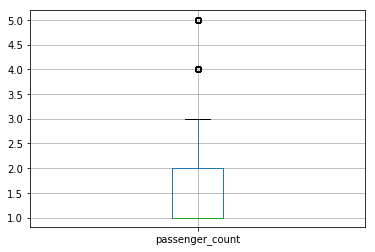

In [14]:
taxi14.boxplot(column='passenger_count')

In [31]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype == np.float:
            n_outliers = len(df[np.abs(stats.zscore(df[column])) > 3])    
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(taxi14)

trip_distance | 450977 | float64
pickup_longitude | 199784 | float64
pickup_latitude | 199799 | float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


dropoff_longitude | 0 | float64
dropoff_latitude | 0 | float64
fare_amount | 235049 | float64
surcharge | 412 | float64
mta_tax | 29271 | float64
tip_amount | 251427 | float64
tolls_amount | 386797 | float64
total_amount | 304491 | float64


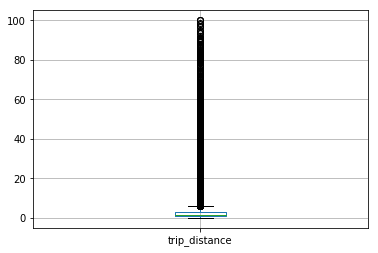

In [56]:
taxi14.boxplot(column='trip_distance');

In [57]:
taxi14.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07,1.441055e+07
mean,1.525889e+00,2.790610e+00,-7.294388e+01,4.018047e+01,1.034287e+00,-7.288374e+01,4.014809e+01,1.201655e+01,3.148430e-01,4.981892e-01,1.457008e+00,2.403245e-01,1.452788e+01
std,1.082084e+00,3.326219e+00,8.683094e+00,4.817866e+00,7.314714e-01,8.940227e+00,4.952294e+00,1.009179e+01,3.633020e-01,3.003526e-02,2.245957e+00,1.191292e+00,1.219075e+01
min,1.000000e+00,0.000000e+00,-1.800000e+02,-1.800000e+02,0.000000e+00,-7.754167e+02,-1.800000e+02,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,1.000000e+00,1.000000e+00,-7.399199e+01,4.073530e+01,1.000000e+00,-7.399135e+01,4.073416e+01,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,1.000000e+00,1.700000e+00,-7.398184e+01,4.075294e+01,1.000000e+00,-7.398007e+01,4.075333e+01,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01
75%,2.000000e+00,3.080000e+00,-7.396734e+01,4.076722e+01,1.000000e+00,-7.396349e+01,4.076837e+01,1.350000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.610000e+01
max,5.000000e+00,1.000000e+02,8.054390e+01,7.328431e+01,2.100000e+02,1.193360e+02,4.040833e+02,5.000000e+02,1.340000e+01,5.000000e-01,2.000000e+02,2.000000e+01,7.000000e+02


In [58]:
taxi14.shape

(14410553, 17)

In [59]:
taxi14 = taxi14[taxi14.trip_distance<5]

In [60]:
taxi14 = taxi14[(np.abs(stats.zscore(taxi14.trip_distance)) < 3)]

In [61]:
taxi14.shape

(12547898, 17)

trip_distance | 0 | float64
pickup_longitude | 181225 | float64
pickup_latitude | 181235 | float64
dropoff_longitude | 0 | float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


dropoff_latitude | 0 | float64
fare_amount | 59682 | float64
surcharge | 371 | float64
mta_tax | 24211 | float64
tip_amount | 62391 | float64
tolls_amount | 35591 | float64
total_amount | 65517 | float64


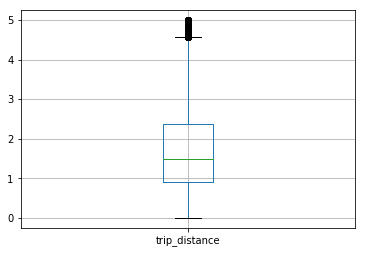

In [45]:
taxi14.boxplot(column='trip_distance');
outliers_col(taxi14)

In [63]:
taxi14 = taxi14[taxi14.pickup_longitude!=0.0]
taxi14 = taxi14[taxi14.dropoff_longitude!=0.0]
taxi14 = taxi14[taxi14.pickup_latitude!=0.0]
taxi14 = taxi14[taxi14.dropoff_latitude!=0.0]
taxi14.shape

(12350347, 17)

In [66]:
outliers_col(taxi14)

trip_distance | 0 | float64
pickup_longitude | 605 | float64
pickup_latitude | 449 | float64
dropoff_longitude | 539 | float64
dropoff_latitude | 446 | float64
fare_amount | 57586 | float64
surcharge | 341 | float64
mta_tax | 16769 | float64
tip_amount | 59502 | float64
tolls_amount | 31685 | float64
total_amount | 66311 | float64


## Exploring data types

In [ ]:
for col in ['vendor_id', 'playgrounds', 'sports', 'roading']:
    public[col] = public[col].astype('category')

In [10]:
taxi14['pickup_datetime'] =  pd.to_datetime(taxi14['pickup_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

In [11]:
taxi14['dropoff_datetime']= pd.to_datetime(taxi14['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S.%f')

## Preliminary data visualization

In [ ]:

taxi14.plot.scatter(x="passenger_count", y="trip_distance");
plt.show()

In [ ]:
taxi14.trip_distance.plot.hist(xlim=(0,35));

In [ ]:
taxi14.passenger_count.plot.kde();

In [ ]:
ttlamount_by_passenger = taxi14.groupby("passenger_count")["total_amount"].mean()
ttlamount_by_passenger.head()
ttlamount_by_passenger.head(10).plot.barh();

In [ ]:
taxi14.vendor_id.value_counts().plot.pie();

ignore this.


ndf = taxi14['pickup_datetime'].str.split(' ',expand=True).rename(columns={0:"pickup_date", 1:'pickup_time'})
taxi14 = pd.concat([taxi14,ndf],1)
taxi14 = taxi14.drop(['pickup_datetime'],1)

ndf = taxi14['dropoff_datetime'].str.split(' ',expand=True).rename(columns={0:"dropoff_date", 1:'dropoff_time'})
taxi14 = pd.concat([taxi14,ndf],1)
taxi14 = taxi14.drop(['dropoff_datetime'],1) ##

#split the date and time on the space abd delete the original columns